# BATCH II Scan Error Result Analysis

#### Updated: June 20, 2023 by Ashley Ferreira

Please reference notebook 19 & 20 for more context, this code is meant to analyze the results from [scan_error_detection_multi_instance.py](https://github.com/asc-csa/Alouette_extract/blob/working/error_detection/scan_error_detection_multi_instance.py).

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set path to results file, using long form for L drive since just L: gives me bugs
outFile = '//SAQCJ3YWVDCP003.csa.space.gc.ca/L-DFS/DATA/Alouette_I/BATCH_II_scan_error_detection_Run1/results.csv'

#### Analyzing Results
You will probably want to add some code to check for duplicates and check that all of the data is present in the results file.

c:\DevSoftware\Anaconda38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


rows filtered out due to errors: 484


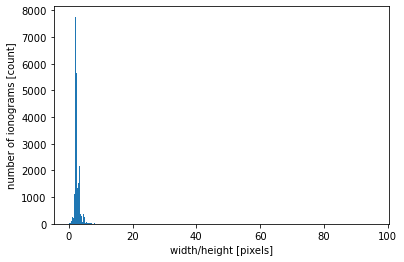

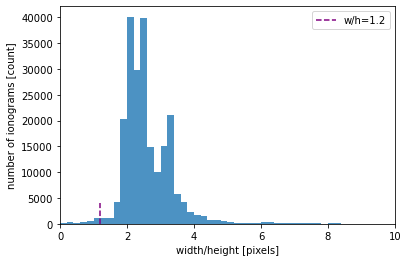

1.22 % of ionograms have w/h < 1.2


In [3]:
# read in csv file
df_results = pd.read_csv(outFile)
total_len = len(df_results)

# filter out error rows
df_results = df_results.loc[df_results['says_isis'] != 'ERR']
filtered_down_len = len(df_results)
print('rows filtered out due to errors:', total_len - filtered_down_len)

# calculate aspect ratios
w = df_results['width'].astype(int)
h = df_results['height'].astype(int)
aspect_ratios = w/h

# histogram of aspect ratios
plt.hist(aspect_ratios, bins='auto')
plt.xlabel('width/height [pixels]')
plt.ylabel('number of ionograms [count]')
plt.show()

# make histogram data more clear (larger bins and more zoomed in)
plt.hist(aspect_ratios, bins=np.arange(0.0, 10.0, 0.20), alpha=0.8)
plt.xlabel('width/height [pixels]')
plt.ylabel('number of ionograms [count]')
plt.xlim(0,10)
#plt.yscale('log')

# add vertical line at w/h = 1.2
plt.vlines(x=1.2, ymin=0, ymax=4000, colors='purple', linestyles='--', label='w/h=1.2')
plt.legend()
plt.show()

# percentage of w/h < 1.2
n = len([ x for x in aspect_ratios if x < 1.2 ])
print(round(100*n/filtered_down_len,2), '% of ionograms have w/h < 1.2')

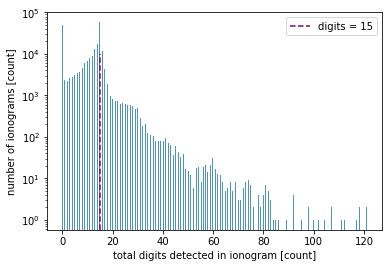

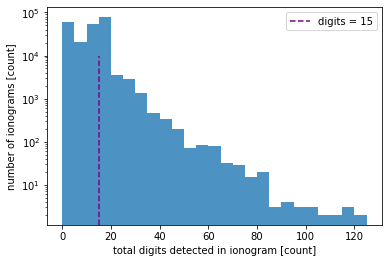

12.68 % of ionograms have digit_count > 15


In [4]:
# log historgam of metadata readings
digit_counts = df_results['digit_count'].astype(int)

plt.hist(digit_counts, bins='auto', alpha=0.8)
plt.xlabel('total digits detected in ionogram [count]')
plt.ylabel('number of ionograms [count]')
plt.yscale('log')
plt.vlines(x=15, ymin=0, ymax=pow(10,4), colors='purple', linestyles='--', label='digits = 15')
plt.legend()
plt.show()

# make a more clear plot using larger bins
plt.hist(digit_counts, bins=np.arange(0, 130, 5), alpha=0.8)
plt.xlabel('total digits detected in ionogram [count]')
plt.ylabel('number of ionograms [count]')
plt.yscale('log')
plt.vlines(x=15, ymin=0, ymax=pow(10,4), colors='purple', linestyles='--', label='digits = 15')
plt.legend()
plt.show()

# percentage with digit_count > 15
n = len([ x for x in digit_counts if x > 15 ])
print(round(100*n/filtered_down_len,2), '% of ionograms have digit_count > 15')

In [5]:
# ISIS text on images
df_isis = df_results.loc[df_results['says_isis'] == 'True']
isis_img_pct = 100*len(df_isis)/filtered_down_len
print('total number of images:', filtered_down_len)
print('number of images with flagged ISIS text:', len(df_isis))
print('percentatge of ionogram images with flagged ISIS text:', round(isis_img_pct,  2), '%\n\n')

# unique ISIS subdirectories
subdirs_isis = df_isis['Subdirectory']
unique_subdirs_isis = set(subdirs_isis)
subdirs_tot = df_results['Subdirectory']
unique_subdirs_tot = set(subdirs_tot)
isis_subdir_pct = 100*len(unique_subdirs_isis)/len(unique_subdirs_tot)
print('total number of subdirectories:', len(unique_subdirs_tot))
print('number of subdirectories with flagges ISIS text:', len(unique_subdirs_isis))
print('percentatge of subdirectories with flagged ISIS text:', round(isis_subdir_pct,  2), '%\n\n')


total number of images: 222027
number of images with flagged ISIS text: 237
percentatge of ionogram images with flagged ISIS text: 0.11 %


total number of subdirectories: 618
number of subdirectories with flagges ISIS text: 23
percentatge of subdirectories with flagged ISIS text: 3.72 %




Note that it only takes one image flagged as having ISIS text to mean that the whole subdirectory is likely ISIS data since there are a lesser number of ISIS metadata logs from which we detect the ISIS text (no ISIS text on the ionograms themselves usually).